# Unraveling MBTI Types from Online Posts


## Data Preprocessing

In [8]:
#pip install pandas nltk

In [9]:
#pip install scikit-learn

In [2]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

/var/folders/4_/8jk7rgt141nghfj9gsw4_thm0000gn/T/ipykernel_31310/3329704558.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zainanasalma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zainanasalma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zainanasalma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import pandas as pd

df = pd.read_csv('cleaned_dataset_1000.csv')


Here is an example to illustrate the data-cleaning process:

By considering the last post, we can see that the post we can see that

*Move to the Denver area and start a new life for myself.*

is converted to

*move denver area start new life*

The stop words 'to', 'the', 'and', 'a', 'for', 'myself' are removed. Every word is in lowercase letters. 

In [7]:
df.iloc[0]['posts']

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [8]:
df.iloc[0]['cleaned_posts']

'||||||enfp intj moment sportscenter top ten play prank|||lifechanging experience life|||repeat today|||may perc experience immerse|||last thing infj friend posted facebook committing suicide next day rest peace|||hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth||||||welcome stuff|||game set match|||prozac wellbrutin least thirty minute moving leg dont mean moving sitting desk chair weed moderation maybe try edible healthier alternative|||basically come three item youve determined type whichever type want would likely use given type cognitive function whatnot left|||thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim|||dear enfp favorite video game growing current favorite video game cool||||||appears late sad|||there someone everyone|||wait thought confidence good thing|||cherish time solitude bc revel within inner world whereas time id workin 

In [9]:
df

,type,posts,cleaned_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,||||||enfp intj moment sportscenter top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding lack post alarming|||sex boring pos...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one|||course say know thats blessing curs...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...
4,ENTJ,'You're fired.|||That's another silly misconce...,youre fired|||thats another silly misconceptio...
...,...,...,...
995,ENFP,"As an INTJ, I have been very interested in EST...",intj interested estjs reason share te function...
996,ENTP,http://i975.photobucket.com/albums/ae240/Where...,|||k irresistible|||lol rofl rly wtf ppl|||laz...
997,INFP,"'Hello, you look lovely...|||A quick recap on ...",hello look lovely|||quick recap general journe...
998,ENTJ,'I start every single phone conversation with ...,start every single phone conversation hey resp...


In [10]:
#pip install tensorflow

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

from sklearn.metrics import accuracy_score


2024-02-08 16:10:37.469298: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
#Parameters:
MAX_SEQUENCE_LENGTH = 800 # Max number of words in each complaint.
VOCAB_SIZE = 24873 # The maximum number of words to be used    ----- len(word_index)+1
EMBEDDING_DIM = 200 # Dimension of the word embedding vectors (50, 100, 200, 300) #Each token is represented as a vector in this space, and the size of the vector is the embedding size
num_classes = 16

RNNS using LSTM

create text encoder

In [16]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE) # Setup tokenizer
tokenizer.fit_on_texts(df['cleaned_posts']) # Fit tokenizer on our text data
tokenizer.word_index # Get our learned vocabulary
word_index = tokenizer.word_index # Get our learned vocabulary
word_index
len(word_index)
VOCAB_SIZE = len(word_index)+1


In [17]:
X = tokenizer.texts_to_sequences(df['cleaned_posts']) # Convert text to sequence USING tokenizer created above
print('text to sequence tooks like' , X[0])
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen= MAX_SEQUENCE_LENGTH) # Pad the sequence to the same length to make it uniform
print('text sequence to sequence pad looks like' ,X[0])

y = df['type'] 
y_one_hot = pd.get_dummies(y)   # One hot encode the target variable

text to sequence tooks like [108, 67, 279, 16634, 627, 1834, 253, 9883, 8471, 144, 31, 1728, 240, 112, 601, 144, 6695, 147, 10, 68, 23, 467, 931, 5652, 1835, 393, 58, 673, 1549, 330, 233, 193, 355, 7454, 721, 86, 3735, 11, 134, 279, 1289, 70, 429, 124, 11, 11, 2061, 176, 174, 203, 557, 948, 6127, 16635, 164, 5263, 489, 1092, 1870, 3, 54, 1092, 965, 2855, 3893, 1978, 6696, 84, 70, 5264, 4217, 2025, 406, 59, 468, 2277, 378, 2517, 16, 4049, 16, 22, 9, 307, 132, 498, 16, 505, 122, 4662, 397, 10, 6696, 4946, 910, 305, 203, 21, 6, 753, 21, 6, 701, 1198, 255, 12089, 558, 498, 9884, 447, 108, 299, 305, 203, 1067, 786, 299, 305, 203, 302, 1729, 605, 386, 155, 33, 121, 545, 43, 1125, 21, 10, 6128, 11, 2856, 2062, 6697, 776, 1162, 104, 2578, 11, 64, 16636, 215, 11, 3, 595, 5, 30, 74, 1836, 150, 988, 36, 12090, 16637, 273, 629, 187, 4218, 5653, 195, 262, 32, 3736, 7455, 839, 8, 2767, 140, 2091, 72, 1618, 12, 172, 6129, 8472, 630, 16638, 6129, 4663, 26, 1174, 1478, 5654, 1677, 2091, 63, 766, 1290, 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1234)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

print("X", X_train)
print('-------------')
print("y is ", y_test.head())

(800, 800) (800, 16)
(200, 800) (200, 16)
X [[ 337  110  318 ... 8104  948  151]
 [   0    0    0 ...    2   21 1323]
 [   0    0    0 ...  386   29    3]
 ...
 [   0    0    0 ...  108   61    2]
 [   0    0    0 ...   53   17  638]
 [   0    0    0 ...  746 1231  586]]
-------------
y is        ENFJ   ENFP   ENTJ   ENTP   ESFJ   ESFP   ESTJ   ESTP   INFJ   INFP  \
681  False  False  False  False  False  False  False  False  False  False   
990  False  False  False  False  False  False  False  False   True  False   
155  False  False  False   True  False  False  False  False  False  False   
768  False  False  False  False  False  False  False  False  False   True   
438  False  False  False  False  False  False  False  False  False  False   

      INTJ   INTP   ISFJ   ISFP   ISTJ   ISTP  
681   True  False  False  False  False  False  
990  False  False  False  False  False  False  
155  False  False  False  False  False  False  
768  False  False  False  False  False  False  
438  

### Model 

Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step. This is a short-term memory to process Sequential data

Advantages : 
- RNN has a memory that captures what has been calculated so far.
- RNNs are ideal for text and speech data analysis.

Disadvantages: 
- RNN suffers from exploding and vanishing gradient, which makes the RNN model learn slower by propagating a lesser amount of error backward.
- This works well for short sentences, when we deal with a long article, there will be a long term dependency problem

Long Short Term Memory network usually just called “LSTM” — is a special kind of RNN. It is capable of learning long-term dependencies. LLSTM is explicitly designed to avoid the long-term dependency problem.

How do LSTM solve this problem? Thanks to their architecture!


LSTM has chains of repeating the LSTM block. It is called LSTM cell. Each LSTM cells have four neural network layers interacting within: Cell State, Forget Gate, Input Gate, Output Gate
Each LSTM cell receives an input from an Input sequence, previous cell state and output from previous LSTM cell.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1234)

model = Sequential() # Call Sequential to initialize a network
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=X.shape[1])) # Add an embedding layer which represents each unique token as a vector
model.add(SpatialDropout1D(0.2)) # Dropout layer to avoid overfitting
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) # Recurrent layer
model.add(Dense(num_classes, activation='softmax')) # Output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the network

epochs = 25 # Number of passes through entire dataset
batch_size = 64 # Number of samples processed before the model is updated

history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.2 ,
                    callbacks=[
                        EarlyStopping(monitor='val_loss', 
                                      patience=5,
                                      min_delta=1e-8)]) # Train the model


Epoch 1/25
10/10 [==============================] - 21s 2s/step - loss: 2.7382 - accuracy: 0.2203 - val_loss: 2.6371 - val_accuracy: 0.2125
Epoch 2/25
10/10 [==============================] - 24s 3s/step - loss: 2.3858 - accuracy: 0.2531 - val_loss: 2.3190 - val_accuracy: 0.2125
Epoch 3/25
10/10 [==============================] - 20s 2s/step - loss: 2.2371 - accuracy: 0.2672 - val_loss: 2.3014 - val_accuracy: 0.2125
Epoch 4/25
10/10 [==============================] - 18s 2s/step - loss: 2.1743 - accuracy: 0.2531 - val_loss: 2.2953 - val_accuracy: 0.2125
Epoch 5/25
10/10 [==============================] - 17s 2s/step - loss: 2.0979 - accuracy: 0.2891 - val_loss: 2.2872 - val_accuracy: 0.2062
Epoch 6/25
10/10 [==============================] - 19s 2s/step - loss: 1.9079 - accuracy: 0.3641 - val_loss: 2.2792 - val_accuracy: 0.2125
Epoch 7/25
10/10 [==============================] - 16s 2s/step - loss: 1.6255 - accuracy: 0.6031 - val_loss: 2.3155 - val_accuracy: 0.2313
Epoch 8/25
10/10 [==

In [45]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 800, 200)          7394600   
                                                                 
 spatial_dropout1d_8 (Spati  (None, 800, 200)          0         
 alDropout1D)                                                    
                                                                 
 lstm_8 (LSTM)               (None, 100)               120400    
                                                                 
 dense_8 (Dense)             (None, 16)                1616      
                                                                 
Total params: 7516616 (28.67 MB)
Trainable params: 7516616 (28.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
print(X_test)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)


[[    0     0     0 ...  1006   167  1999]
 [    0     0     0 ...   491  1092  3688]
 [    0     0     0 ...  2339  1690   845]
 ...
 [    0     0     0 ...    15 13334  1436]
 [    5  3244   152 ...   989  1046  3204]
 [    0     0     0 ...    75  1217   176]]


7/7 [==============================] - 2s 221ms/step
[ 9  9  9  3  8  9 10  8  9 15  8  8  9 15  8  9  9  3  3 10  9 10  9  9
 10  8  9  8 11  8  9 11  9 10 10 11 15  9  9 10 11 11  9  3  8 11  3 10
  9 11  8  3  8  9  3 10  9  3  9 10  3  9  3  3  9 10  8  9 10 10 10 11
  8  3  3 10  9  9  9  9  9  9 11 10  3 11  9  3  9  9  3 10 15  3  3  3
  3 11  8  3 10  9  3  8 10 11 10  9  9 10  9  9  3 10  3  9  8 11 10 10
 10  8 11  9 11 11  3 11  3  3 11  9  9 11  9  9  8  3  3  8  8  9  8  8
  9  3  9  9 11 11  9 11  9  9  8  8 11  8 15  8  9  8  8  9  8  3  9  3
 10  3  3  9  3 10 10 11  9 11 11 11 11 10  9  3  8 11  9 15  9 10  9 10
  8  8  8 10  3 11  8  3]


In [47]:
y_test = np.argmax(y_test.values, axis=1) # Convert one hot encoded y_test back to categorical


In [48]:
print(y_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[10  8  3  9 10  1  8 10  8  1 10  1  1 11  9  9  8 11  8 15  2  0  8  3
  8  1  9  9 10  8  8  1  9  9  9 10 10  1 10 10 15  9  8  9 15 11 10  1
  1  1  1 10 10  9 11  1 15  3  1  8  9  9 11  9 11 11  3 13  8 10  8 11
  9 14  3 10  8  8  8 13  8  9 10 11  3  3  8  9  6  8 10  3 10  8  9 11
  1 10 10  8  9  1 10  9  8  9  9  2  9  1  0  9 10  9 10  9 10  0 10 11
  3  8 11  9 10  1  9  3 11 11  1  9  9  3 11  1 11 11  9 10 11  7 10 10
  8 13  0  3 11  9  2  9  9  7  9 10  8 11  9 10 11 15  1  8 11  3 11  9
  1  8  8  8  8 14  3  8 10  1 11  8  8  9  0  3  1  3 10 10 13  9 11  2
  9 10  3 10 13  9 11 13]
Accuracy: 0.15


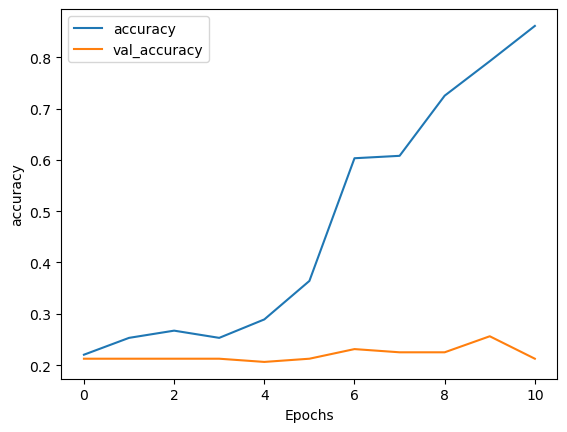

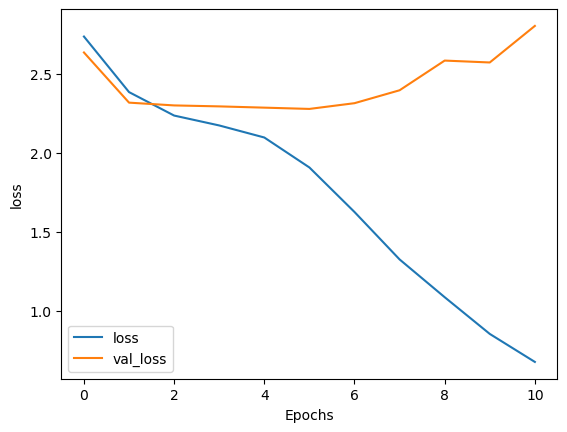

In [49]:
from matplotlib import pyplot as plt
def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
graph_plots(history, "accuracy")
graph_plots(history, "loss")


#### what if I don't one_hot encode my labels and do a multiclass classification with each class represented as an integer 

In [50]:
label_tokenizer = tf.keras.preprocessing.text.Tokenizer()
label_tokenizer.fit_on_texts(list(y))
label_seq = np.array(label_tokenizer.texts_to_sequences(y))
label_seq = label_seq.reshape(-1)

label_seq = label_seq - 1
X_train, X_test, y_train, y_test = train_test_split(X, label_seq, test_size=0.2, random_state=1234)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)
print(min(y_train))


(800, 800) (800,)
(200, 800) (200,)
0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, label_seq, test_size=0.2, random_state=1234)

model = Sequential() # Call Sequential to initialize a network
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=X.shape[1])) # Add an embedding layer which represents each unique token as a vector
model.add(SpatialDropout1D(0.2)) # Dropout layer to avoid overfitting
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) # Recurrent layer
model.add(Dense(num_classes, activation='softmax')) # Output layer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the network
epochs = 25 # Number of passes through entire dataset
batch_size = 64 # Number of samples processed before the model is updated

history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.2 ,
                    callbacks=[
                        EarlyStopping(monitor='val_loss', 
                                      patience=5,
                                      min_delta=1e-8)]) # Train the model

Epoch 1/25
10/10 [==============================] - 21s 2s/step - loss: 2.7435 - accuracy: 0.1719 - val_loss: 2.6722 - val_accuracy: 0.2000
Epoch 2/25
10/10 [==============================] - 16s 2s/step - loss: 2.4092 - accuracy: 0.2734 - val_loss: 2.3643 - val_accuracy: 0.2125
Epoch 3/25
10/10 [==============================] - 14s 1s/step - loss: 2.2383 - accuracy: 0.2531 - val_loss: 2.3049 - val_accuracy: 0.2125
Epoch 4/25
10/10 [==============================] - 15s 1s/step - loss: 2.1926 - accuracy: 0.2531 - val_loss: 2.2965 - val_accuracy: 0.2125
Epoch 5/25
10/10 [==============================] - 15s 1s/step - loss: 2.1249 - accuracy: 0.3297 - val_loss: 2.2974 - val_accuracy: 0.2062
Epoch 6/25
10/10 [==============================] - 16s 2s/step - loss: 2.0013 - accuracy: 0.3875 - val_loss: 2.2928 - val_accuracy: 0.2188
Epoch 7/25
10/10 [==============================] - 15s 1s/step - loss: 1.7357 - accuracy: 0.5250 - val_loss: 2.3661 - val_accuracy: 0.1813
Epoch 8/25
10/10 [==

In [52]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 800, 200)          7394600   
                                                                 
 spatial_dropout1d_9 (Spati  (None, 800, 200)          0         
 alDropout1D)                                                    
                                                                 
 lstm_9 (LSTM)               (None, 100)               120400    
                                                                 
 dense_9 (Dense)             (None, 16)                1616      
                                                                 
Total params: 7516616 (28.67 MB)
Trainable params: 7516616 (28.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

7/7 [==============================] - 1s 149ms/step
[0 0 1 4 3 1 3 3 0 1 3 0 5 4 3 3 0 2 3 4 3 3 0 0 5 1 3 1 4 1 0 2 0 3 3 1 4
 3 0 3 2 2 0 1 1 2 4 3 1 2 1 1 5 0 4 4 1 1 3 3 0 3 1 4 0 4 3 0 3 4 2 4 1 3
 4 3 0 1 0 3 0 3 2 3 3 2 1 0 1 3 3 4 4 1 0 4 4 4 4 4 4 4 2 4 3 3 0 1 1 4 0
 0 3 4 1 0 1 2 0 2 2 1 2 0 3 4 4 4 4 1 1 1 1 2 2 4 1 1 1 4 1 3 0 2 0 4 0 1
 2 2 0 4 3 1 4 4 4 1 2 1 3 0 1 3 4 1 0 3 1 3 2 0 0 3 0 2 2 2 0 4 2 3 0 4 2
 2 1 4 3 1 3 5 3 2 5 3 1 4 3 1]
[ 3  1  4  0  3  5  1  3  1  5  3  5  5  2  0  0  1  2  1  6  7  9  1  4
  1  5  0  0  3  1  1  5  0  0  0  3  3  5  3  3  6  0  1  0  6  2  3  5
  5  5  5  3  3  0  2  5  6  4  5  1  0  0  2  0  2  2  4  8  1  3  1  2
  0 11  4  3  1  1  1  8  1  0  3  2  4  4  1  0 15  1  3  4  3  1  0  2
  5  3  3  1  0  5  3  0  1  0  0  7  0  5  9  0  3  0  3  0  3  9  3  2
  4  1  2  0  3  5  0  4  2  2  5  0  0  4  2  5  2  2  0  3  2 12  3  3
  1  8  9  4  2  0  7  0  0 12  0  3  1  2  0  3  2  6  5  1  2  4  2  0
  5  1  1  1  1 11  4  1  3  

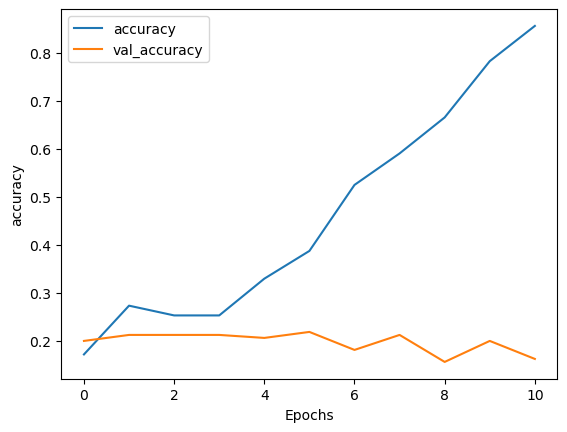

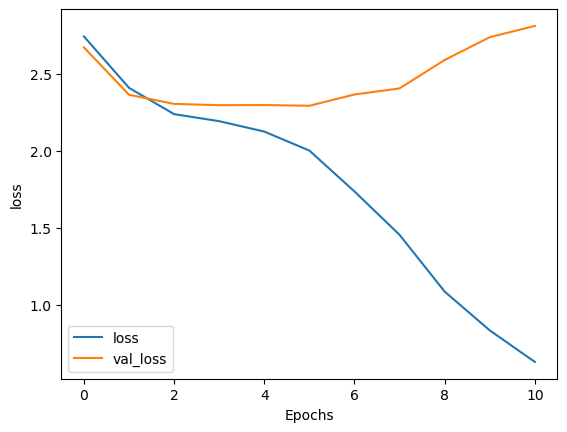

In [54]:
graph_plots(history, "accuracy")
graph_plots(history, "loss")

Indeed,one hot encoding is better.

### Improving the accuracy methods:

- Bbidirectional LSTM
- experiment with pre-trained embeddings like GloVe or Word2Vec for potentially better representations of your text.
- changing the number of units in the LSTM layer, or experiment with stacking multiple LSTM layers (Risk of overfitting and quiet costly)
- Use GRU instead of LSTM or add conv1D before LSTM
- Adjust dropout rates 
- Use L1/L2 reg 
- Optimizers: SGD or RMSprop
- Adjust Batchsize or Lr
- Transformer????
- Error Analysis

### First : Bidirectional LSTM

In [55]:
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers import Dense, Activation, Dropout


Bidirectional LSTM trains two layers on the input sequence. One LSTM layer on the input sequence and second LSTM layer on the reversed copy of the input sequence provides more context for learning sequences

In [56]:
#Reserve word_idex
#reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#def decode_article(text):
# return ' '.join([reverse_word_index.get(i,'?') for i in text])
#print(decode_article(X[0]))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1234)
print(X_train.shape,y_train.shape)

(800, 800) (800, 16)


In [58]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     EMBEDDING_DIM))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(EMBEDDING_DIM, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [59]:
epochs = 10 # Number of passes through entire dataset
batch_size = 64 # Number of samples processed before the model is updated

history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.2 ,
                    callbacks=[
                        EarlyStopping(monitor='val_loss', 
                                      min_delta=0.001)]) # Train the model



Epoch 1/10
10/10 [==============================] - 144s 14s/step - loss: 2.7679 - accuracy: 0.1187 - val_loss: 2.7564 - val_accuracy: 0.1437
Epoch 2/10
10/10 [==============================] - 123s 12s/step - loss: 2.7383 - accuracy: 0.1406 - val_loss: 2.6694 - val_accuracy: 0.2125
Epoch 3/10
10/10 [==============================] - 116s 12s/step - loss: 2.6680 - accuracy: 0.2047 - val_loss: 2.6613 - val_accuracy: 0.2125
Epoch 4/10
10/10 [==============================] - 127s 13s/step - loss: 2.6604 - accuracy: 0.2109 - val_loss: 2.6621 - val_accuracy: 0.2125


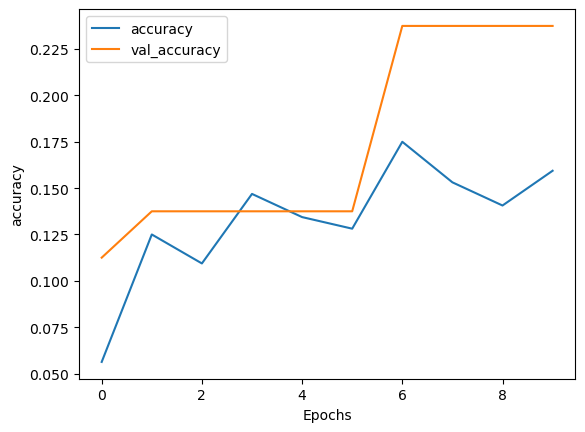

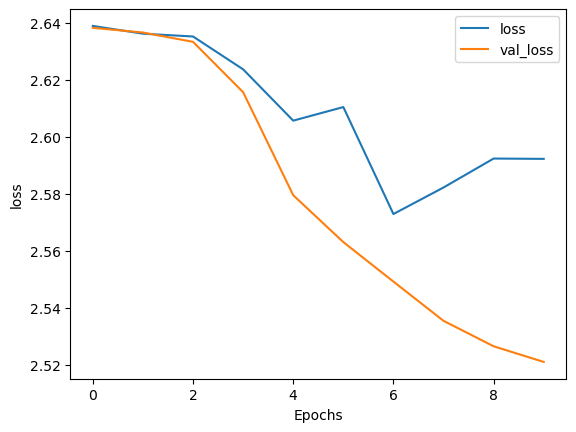

In [ ]:
def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
graph_plots(history, "accuracy")
graph_plots(history, "loss")